In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Step 1. Measure the Determinants of Confidence Including Crime Outcomes

In [39]:
outcome_df = pd.read_csv('C:/Users/20220678/Microsoft VS Code/JBG050-DC2-GRP21/data/curated_data/outcome.csv')

print(outcome_df['Outcome type'].unique())

['Investigation complete; no suspect identified' 'Local resolution'
 'Suspect charged' 'Offender given penalty notice'
 'Offender given a caution' 'Offender given a drugs possession warning'
 'Suspect charged as part of another case'
 'Formal action is not in the public interest'
 'Unable to prosecute suspect']


In [60]:
def categorize_outcome(outcome):
    successful_outcomes = [
        'Suspect charged', 
        'Offender given penalty notice',
        'Offender given a caution', 
        'Offender given a drugs possession warning',
        'Suspect charged as part of another case'
    ]
    unsuccessful_outcomes = [
        'Investigation complete; no suspect identified', 
        'Formal action is not in the public interest',
        'Unable to prosecute suspect'
    ]
    
    if outcome in successful_outcomes:
        return "Successful"
    elif outcome in unsuccessful_outcomes:
        return "Unsuccessful"
    else:
        return "Other"

outcome_df['Intervention_Success'] = outcome_df['Outcome type'].apply(categorize_outcome)

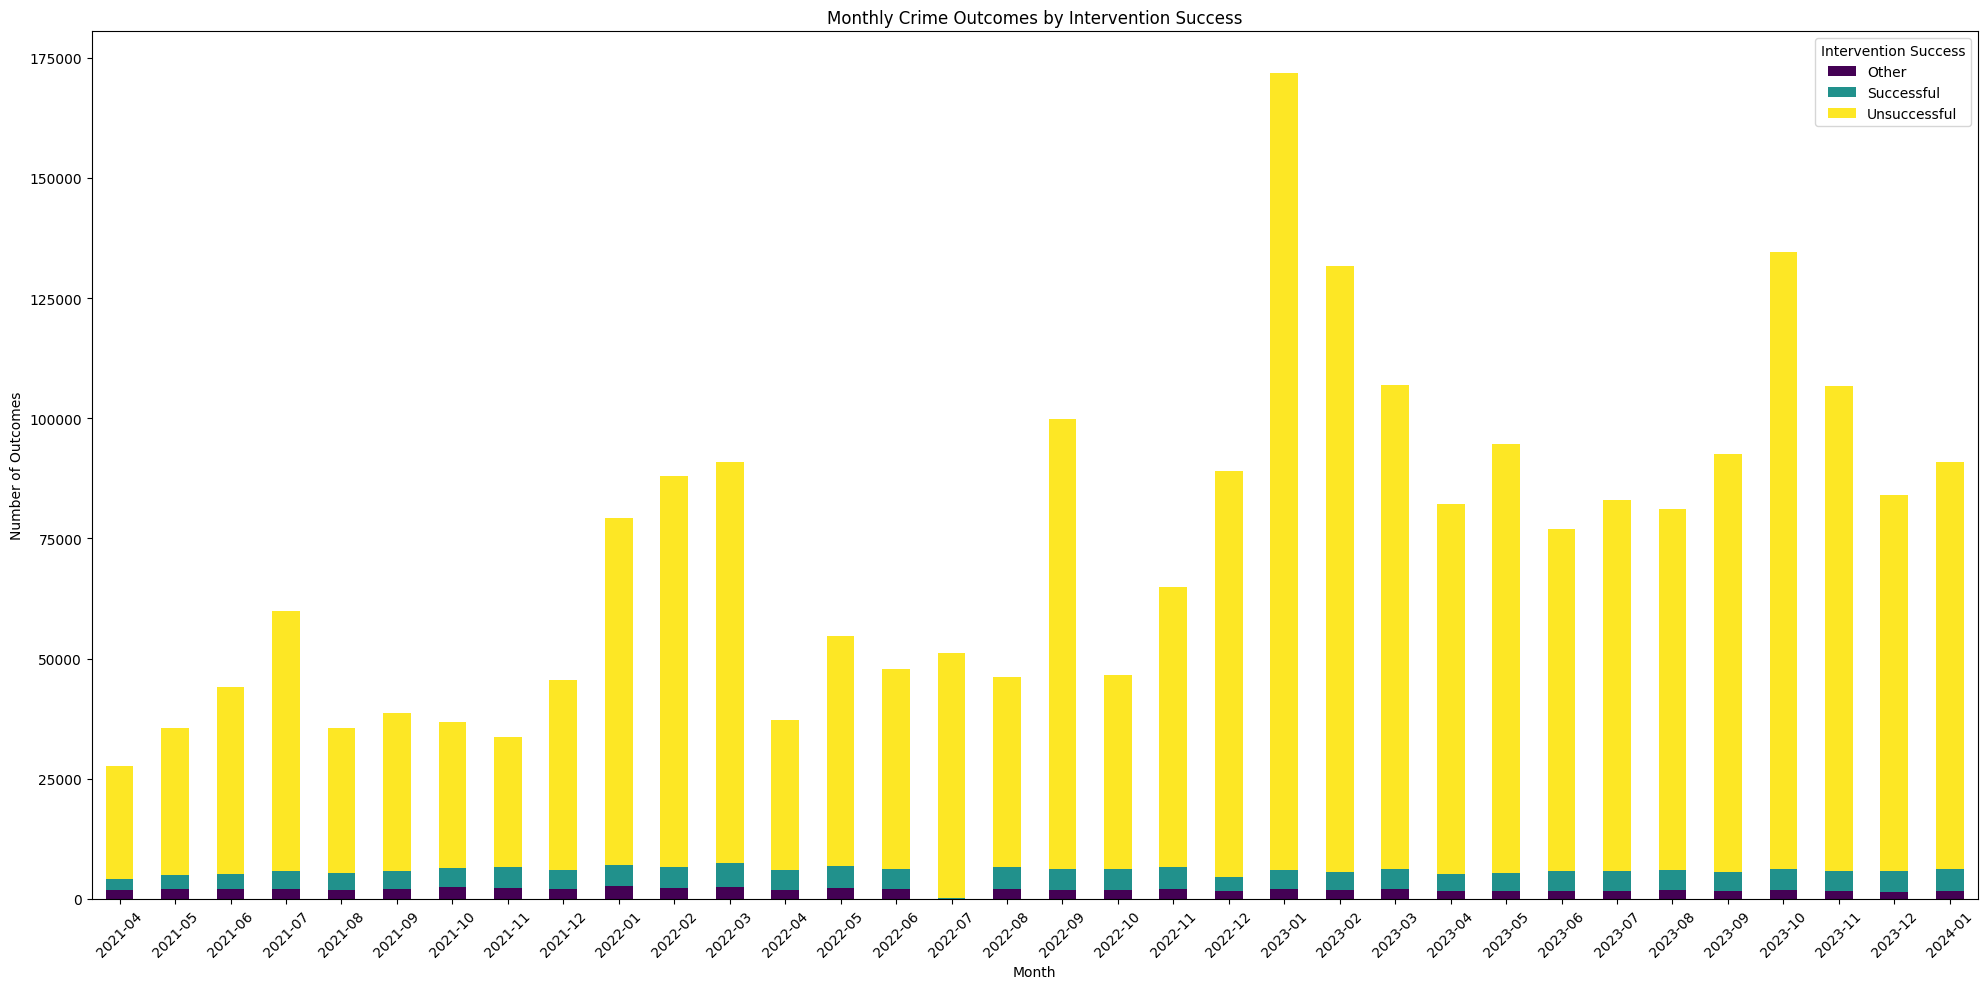

In [61]:
monthly_outcomes = outcome_df.groupby(['Month', 'Intervention_Success']).size().unstack(fill_value=0)

monthly_outcomes.plot(kind='bar', stacked=True, figsize=(20, 10), colormap='viridis')
plt.title('Monthly Crime Outcomes by Intervention Success')
plt.xlabel('Month')
plt.ylabel('Number of Outcomes')
plt.xticks(rotation=45)
plt.legend(title='Intervention Success')
plt.tight_layout()
plt.show()

Step 2. Data Preparation

In [62]:
survey_19_20_path = "data\pas_data_ward_level\PAS_ward_level_FY_19_20.csv"
df = pd.read_csv(survey_19_20_path)

effectiveness_columns = ['Q79I', 'Q79B', 'Q79D', 'Q79E', 'NQ79D']
fairness_engagement_columns = ['Q62B', 'Q62C', 'XQ128C', 'A121']
accountability_columns = ['NQ135BH', 'XQ122A', 'XQ122B']
confidence_columns = ['Q65', 'Q21', 'Q131']  # add anything else we consider a determinant

effectiveness_df = df[effectiveness_columns]
fairness_engagement_df = df[fairness_engagement_columns]
accountability_df = df[accountability_columns]
confidence_df = df[confidence_columns]


C:\Users\20220678\AppData\Local\Temp\ipykernel_2056\1680639987.py:2: DtypeWarning: Columns (41,42,43,131,132,133,213,214,435,444,451) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(survey_19_20_path)


Step 3. Aggregate Responses

In [63]:
# Mode of the responses
mode_effectiveness = effectiveness_df.mode().iloc[0]
mode_fairness_engagement = fairness_engagement_df.mode().iloc[0]
mode_accountability = accountability_df.mode().iloc[0]
mode_confidence = confidence_df.mode().iloc[0]

print("Mode of Effectiveness Questions: \n", mode_effectiveness, "\n")
print("Mode of Fairness and Engagement Questions: \n", mode_fairness_engagement, "\n")
print("Mode of Accountability Questions: \n", mode_accountability, "\n")
print("Mode of Confidence Questions: \n", mode_confidence, "\n")

Mode of Effectiveness Questions: 
 Q79I     5
Q79B     5
Q79D     5
Q79E     5
NQ79D    4
Name: 0, dtype: object 

Mode of Fairness and Engagement Questions: 
 Q62B         Tend to agree
Q62C         Tend to agree
XQ128C                 Yes
A121      Fairly confident
Name: 0, dtype: object 

Mode of Accountability Questions: 
 NQ135BH       Tend to agree
XQ122A     Fairly confident
XQ122B     Fairly confident
Name: 0, dtype: object 

Mode of Confidence Questions: 
 Q65              Less often
Q21             Fairly safe
Q131    Not at all informed
Name: 0, dtype: object 



In [73]:
label_to_value_map = {
    '1 Not at all well': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6': 6,
    '7 Very well': 7,
    "Don't know": 97,
    'Refused': 98,
    'Not Asked': 99,

    'Strongly agree': 5,
    'Tend to agree': 4,
    'Neither agree nor disagree': 3,
    'Tend to disagree': 2,
    'Strongly disagree': 1,
    

    'Yes': 2,
    'No': 1,

    'Very confident': 4,
    'Fairly confident': 3,
    'Not very confident': 2,
    'Not at all confident': 1,

    'At least daily': 6,
    'At least weekly': 5,
    'At least fortnightly': 4,
    'At least monthly': 3,
    'Less often': 2,
    'Never': 1,

    'Very safe': 4,
    'Fairly safe': 3,
    'Fairly unsafe': 2,
    'Very unsafe': 1,
    '(spontaneous) Do not go out at all': 5,
    '(spontaneous) Do not go out alone': 6,

    'Very well informed': 3,
    'Fairly well informed': 2,
    'Not at all informed': 1
}

def label_to_value(label):
    return label_to_value_map.get(label, label)  # Return the label itself if not found in the map


In [74]:
effectiveness_values = df[effectiveness_columns].applymap(label_to_value)
fairness_engagement_values = df[fairness_engagement_columns].applymap(label_to_value)
accountability_values = df[accountability_columns].applymap(label_to_value)
confidence_values = df[confidence_columns].applymap(label_to_value)

In [75]:
# We have nan values as well
for col in confidence_values:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Q65: ['At least fortnightly' 'At least weekly' 'Never' 'At least daily'
 'Less often' nan 'At least monthly']
Unique values in Q21: ['Fairly safe' '(spontaneous) Do not go out at all' 'Very safe'
 'Very unsafe' '(spontaneous) Do not go out alone' 'Fairly unsafe' nan]
Unique values in Q131: ['Not at all informed' 'Fairly well informed' 'Very well informed' nan]


In [76]:
median_effectiveness = effectiveness_values.median()
median_fairness_engagement = fairness_engagement_values.median()
median_accountability = accountability_values.median()
median_confidence = confidence_values.median()

print("Median of Effectiveness Questions: \n", median_effectiveness, "\n")
print("Median of Fairness and Engagement Questions: \n", median_fairness_engagement, "\n")
print("Median of Accountability Questions: \n", median_accountability, "\n")
print("Median of Confidence Questions: \n", median_confidence, "\n")

Median of Effectiveness Questions: 
 Q79I     5.0
Q79B     5.0
Q79D     5.0
Q79E     5.0
NQ79D    4.0
dtype: float64 

Median of Fairness and Engagement Questions: 
 Q62B      4.0
Q62C      4.0
XQ128C    2.0
A121      3.0
dtype: float64 

Median of Accountability Questions: 
 NQ135BH    4.0
XQ122A     3.0
XQ122B     3.0
dtype: float64 

Median of Confidence Questions: 
 Q65     2.0
Q21     3.0
Q131    1.0
dtype: float64 



In [35]:
dont_know = 97
refused = 98
not_asked = 99

all_responses = pd.concat([effectiveness_values, fairness_engagement_values, accountability_values, confidence_values], axis=1)

dont_know_counts = (all_responses == dont_know).sum().sum()
refused_counts = (all_responses == refused).sum().sum()
not_asked_counts = (all_responses == not_asked).sum().sum()

print(f"'Don't know' responses: {dont_know_counts}")
print(f"'Refused' responses: {refused_counts}")
print(f"'Not Asked' responses: {not_asked_counts}")

'Don't know' responses: 0
'Refused' responses: 0
'Not Asked' responses: 0


In [ ]:
# Column C2 is the borough

# List of file paths
file_paths = [
    "data/pas_data_ward_level/PAS_ward_level_FY_15_17.csv",
    "data/pas_data_ward_level/PAS_ward_level_FY_17_18.csv",
    "data/pas_data_ward_level/PAS_ward_level_FY_18_19.csv",
    "data/pas_data_ward_level/PAS_ward_level_FY_19_20.csv"
]

# Columns of interest
column_sets = {
    'effectiveness': ['Q79I', 'Q79B', 'Q79D', 'Q79E', 'NQ79D'],
    'fairness_engagement': ['Q62B', 'Q62C', 'XQ128C', 'A121'],
    'accountability': ['NQ135BH', 'XQ122A', 'XQ122B'],
    'confidence': ['Q65', 'Q21', 'Q131']
}

def preprocess_data(file_path):
    df = pd.read_csv(file_path)
    # Filter columns and apply mapping
    df = df[['C2'] + [col for sublist in column_sets.values() for col in sublist]]
    df = df.applymap(label_to_value)
    df.rename(columns={'C2': 'Borough'}, inplace=True)
    return df

all_data = pd.concat([preprocess_data(path) for path in file_paths])
